# Stalker, startup due dilligence automation

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from IPython.display import Image, display
# BeautifulSoup
from bs4 import BeautifulSoup as bs
from bs4.element import Comment
import urllib.request
from difflib import get_close_matches
import json
# Twitter sentiment analysis
import tweepy
from textblob import TextBlob
# News API
from newsapi import NewsApiClient

# NLTK to analyze webs
import nltk
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.tokenize import word_tokenize
import stlib as st
# Credentials
import credentials as cd

In [2]:
# Connect to database

driver = cd.database['driver']
user = cd.database['user']
password = cd.database['password']
ip = cd.database['ip']
database = cd.database['database']
connection_string = f'{driver}//{user}:{password}@{ip}/{database}?charset=utf8'
engine = create_engine(connection_string)

In [3]:
# Get data from database
#companies = pd.read_sql_table(table_name='companies15', con=connection_string)
#investments = pd.read_sql_table(table_name='investments15', con=connection_string)
people = pd.read_sql_table(table_name='people', con=connection_string)
#rounds = pd.read_sql_table(table_name='rounds15', con=connection_string)

In [8]:

investments = investments.dropna(subset=['raised_amount_usd', 'company_category_list'])
sector_list0 = []
sector_list = []
for item in investments['company_category_list']:
    if ',' in item:
        sector_list0.append(item.split(sep=', '))
    else:
        sector_list0.append(item)
for i in sector_list0:
    if type(i) == list:
        for sec in i:
            sector_list.append(sec)

    else:
        sector_list.append(i)

In [11]:
founder_list = []
name = people.dropna(subset=['first_name']).first_name
surname = people.dropna(subset=['last_name']).last_name
for i in range(len(people.dropna(subset=['first_name']).first_name)):
    founder_list.append([name[i], surname[i]])

## Google search

In [4]:
st.most_warnings(st.find_webs('Theranos'))


        We found something sketchy. You might want to check these links:
        
            - https://en.wikipedia.org/wiki/Theranos
            
            - https://www.businessinsider.com/theranos-founder-ceo-elizabeth-holmes-life-story-bio-2018-4
        


## Getting info about the company from the user

In [7]:
name0 = input('Name of the company: ')
name = st.retrieve_name(name0, companies)

Name of the company: Aple
Did you mean Apple instead? [y or n]: y


In [4]:
sector0 = input('In what sector is this company working?: ')
sector = st.retrieve_sector(sector0, investments)

In what sector is this company working?: Computers


In [21]:
def retrieve_founder(my_founder):
    
    if my_founder in founder_list:
        return my_founder
    elif len(get_close_matches(my_founder, founder_list)) > 0:
        action = input("Did you mean %s instead? [y or n]: " % get_close_matches(my_sector, sector_list) [0])
        if (action == "y"):
            return get_close_matches(my_founder, founder_list)[0]
        else:
            return my_founder

In [4]:
founder = input('What is the name of the founder?: ')

What is the name of the founder?: Tim Cook


## Looking for info in Crunchbase

The sentiment about Computers industry in Twitter is Negative
There have been 3 news pieces about Computers industry recently and are in general Positive
The amount of money invested in Computers companies has increased by 13.89% in the last 10 years, 
it is expected to keep growing by X the next  X years. 
It peaked in year [2006] with $633,710,705.00 invested and its lowest point was in year [2012] with $99,438,589.00 invested.


NameError: name 'plt' is not defined

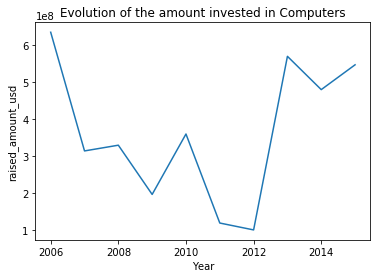

In [5]:
st.category(sector, investments)

In [5]:
st.founders(founder, people)

We found this information about Tim Cook:
Founder's name: Tim Cook 
Title: CEO at Apple
Organization: Apple
Location: Palo Alto, California, US
Twitter URL: http://twitter.com/tim_cook
Linkedin URL: https://www.linkedin.com/in/tim-cook-8284949
Facebook URL: https://www.facebook.com/profile.php?id=100013871597704


We found this information about Tim Cook:
Founder's name: Tim Cook 
Title: Vice President, North America at General Atlantic
Organization: General Atlantic
Location: None, None, None
Linkedin URL: http://www.linkedin.com/pub/timothy-cook/3/179/241


We found this information about Tim Cook:
Founder's name: Tim Cook 
Title: Chief Executive Officer at BlueOSS
Organization: BlueOSS
Location: Great Falls, Virginia, US


We found this information about Tim Cook:
Founder's name: Tim Cook 
Title: Chief Executive Officer at BluLogix LLC
Organization: BluLogix LLC
Location: Washington, District of Columbia, US
Linkedin URL: https://www.linkedin.com/in/timdcook/


We found this information about Tim Cook:
Founder's name: Tim Cook 
Title: Co-Founder and President, CEO at Uromedica
Organization: Uromedica
Location: None, None, None
Linkedin URL: https://www.linkedin.com/in/tim-cook-46198611/
The sentiment about Tim Cook in Twitter is Negative

        We found something sketchy. You might want to check this link:
            https://9to5mac.com/guides/tim-cook/
        


In [30]:
def find_companies_by_size(size):
    company_nan = companies.dropna()
    company_sector = company_nan[company_nan['category_list'].str.contains(sector)].drop('index',axis=1).dropna()
    company_sector['total_funding_size']=pd.qcut(company_sector.funding_total_usd, q=[0, .25, .75, 1], labels=['small', 'medium', 'big'])
    if name in company_nan['name']:
        return company_sector[(company_sector['total_funding_size']==size)& (company_sector['funding_total_usd'] > 100000) & (company_sector['status'] != 'closed')& (company_sector['country_code']==company.country_code)].sample()
    else:     
        return company_sector[(company_sector['total_funding_size']==size)& (company_sector['funding_total_usd'] > 100000) & (company_sector['status'] != 'closed')].sample()

In [31]:
def competitor_info(company):
    print(f"Company name: {company.name.item()}")
    print(f"Total money raised: ${format(company.funding_total_usd.item(),',.2f')}")
    print(f"Total rounds: {company.funding_rounds.item()}")
    print(f"Webpage: {company.homepage_url.item()}")
    print(f"Country: {company.country_code.item()}")
    print(f"Status: {company.status.item()}")
    print(f"Founded in: {company.founded_at.item()}")
    

In [36]:
def startup(name, companies):
    company = companies[companies['name'] == name]
    #display(Image(url=company.profile_image_url))
    
    try:
        print(f"Company name: {company.name.item()}")
        print(f"Total money raised: ${format(company.funding_total_usd.item(),',.2f')}")
        print(f"Total rounds: {company.funding_rounds.item()}")
        print(f"Status: {company.status.item()}")
   
    # Find competitors
        print('\n')
        print(f"Competitors similar to {company.name.item()}:")
        print('\n')
        competitor_info(find_companies_by_size('small'))
        print('\n')      
        competitor_info(find_companies_by_size('medium'))
        print('\n')     
        competitor_info(find_companies_by_size('big'))
    except: 
        print(f"We couldn't find information about {name} in Crunchbase")
    # Google search
    try:
        most_warnings(find_webs(name))
    except:
        print(f"We haven't found anything worring about {name} on Google in english. Nice!")
    
    

In [33]:
startup(name)

Company name: Apple
Total money raised: $250,000.00
Total rounds: 1
Status: ipo


Competitors similar to Apple:


Company name: AmigoCAT
Total money raised: $129,679.00
Total rounds: 1
Webpage: http://www.amigocat.com/
Country: FRA
Status: operating
Founded in: 2013-01-01


Company name: SpecialNeedsWare
Total money raised: $3,000,000.00
Total rounds: 1
Webpage: http://specialneedsware.com
Country: USA
Status: operating
Founded in: 2011-01-01


Company name: Palo Alto Networks
Total money raised: $329,000,000.00
Total rounds: 5
Webpage: http://www.paloaltonetworks.com
Country: USA
Status: ipo
Founded in: 2005-01-01
We couldn't find info about Apple on google in english


### To improve
> Message if cannot find info (NO)

> Predict growth of market (NO)

> Suggestions (Difflib) (founder)

> Twitter feed with stats (NO)

> Show only first appearence on founder


In [34]:
tring = ['bla', 'bla', 'bla' ,'no' ,'no' ,'no' ,'si', 'que', 'como' ,'cosa']
FreqDist(tring)['bla'] 

3